In [212]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf 
%matplotlib inline
import statsmodels.api as sm
from statsmodels import regression

In [213]:
#Importing data for assets

end = dt.datetime.now()
start = dt.datetime(2018,1,1)
data = yf.download(['^IXIC','TSLA','PCAR','UAL','AAL'],start=start, end=end).Close
data.head(2)

C:\Users\Wale\AppData\Local\Temp\ipykernel_24044\1444430261.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(['^IXIC','TSLA','PCAR','UAL','AAL'],start=start, end=end).Close
[*********************100%***********************]  5 of 5 completed


Ticker,AAL,PCAR,TSLA,UAL,^IXIC
Date,,,,,
2018-01-02,51.647556,36.319290,21.368668,68.940002,7006.899902
2018-01-03,51.014030,36.761959,21.150000,68.489998,7065.529785


#### Calculate returns for the respective assets

In [215]:
data_daily_returns = data.pct_change().dropna()
data_daily_returns.head()

Ticker,AAL,PCAR,TSLA,UAL,^IXIC
Date,,,,,
2018-01-03,-0.012266,0.012188,-0.010233,-0.006527,0.008367
2018-01-04,0.006305,0.012718,-0.008290,0.011243,0.001752
2018-01-05,-0.000380,0.003340,0.006230,0.001444,0.008286
2018-01-08,-0.009877,-0.003196,0.062638,-0.012255,0.002919
2018-01-09,-0.000959,-0.000401,-0.008085,-0.000438,0.000865


##### Rename columns

In [217]:
data_daily_returns.columns = ["TSLA","PCAR","UAL","AAL","NASDAQ_COMPOSITE"]
data_daily_returns.head()


,TSLA,PCAR,UAL,AAL,NASDAQ_COMPOSITE
Date,,,,,
2018-01-03,-0.012266,0.012188,-0.010233,-0.006527,0.008367
2018-01-04,0.006305,0.012718,-0.008290,0.011243,0.001752
2018-01-05,-0.000380,0.003340,0.006230,0.001444,0.008286
2018-01-08,-0.009877,-0.003196,0.062638,-0.012255,0.002919
2018-01-09,-0.000959,-0.000401,-0.008085,-0.000438,0.000865


##### Creating Plots to visualise the returns of each individual assets 

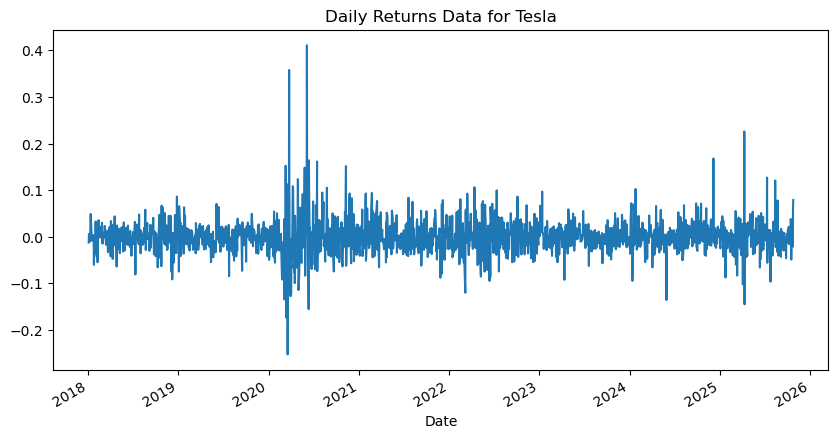

In [219]:
data_daily_returns["TSLA"].plot(figsize = (10,5), title = "Daily Returns Data for Tesla")
plt.show()

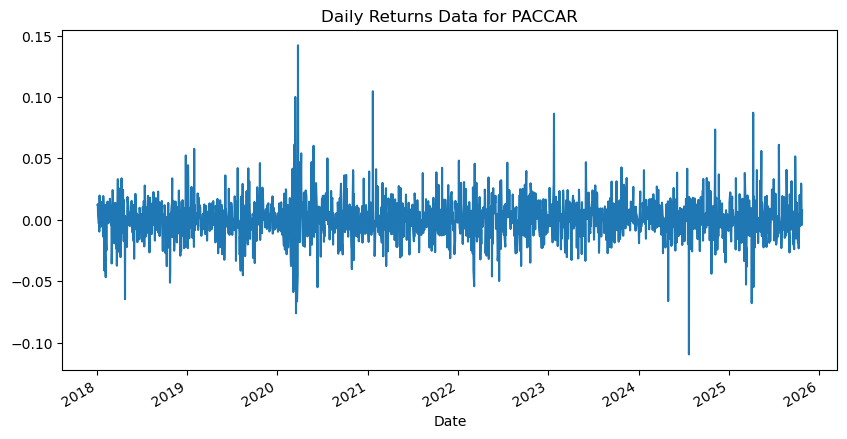

In [220]:
data_daily_returns["PCAR"].plot(figsize = (10,5), title = "Daily Returns Data for PACCAR")
plt.show()

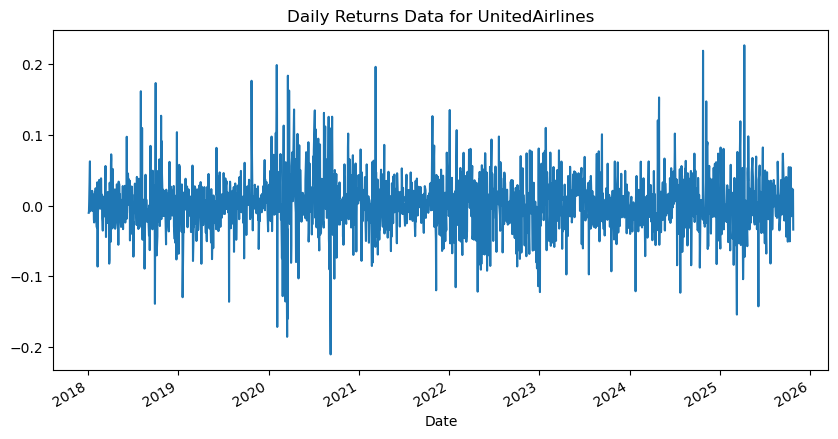

In [221]:
data_daily_returns["UAL"].plot(figsize = (10,5), title = "Daily Returns Data for UnitedAirlines")
plt.show()

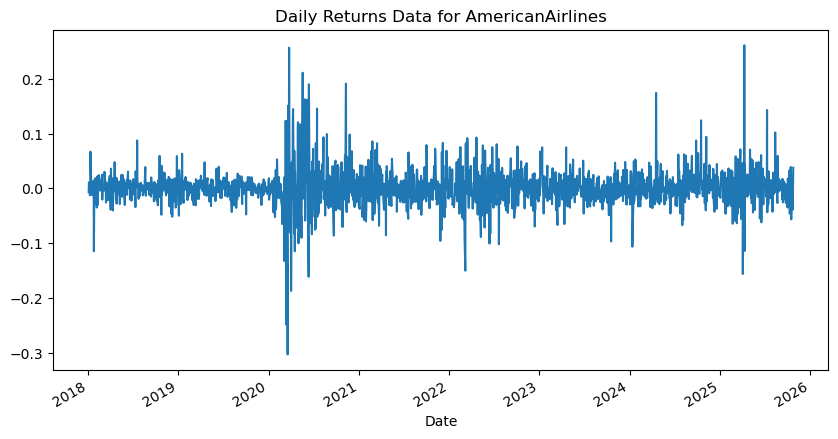

In [326]:
data_daily_returns["AAL"].plot(figsize = (10,5), title = "Daily Returns Data for AmericanAirlines")
plt.show()

In [223]:
data_daily_returns["NASDAQ_COMPOSITE"].plot(figsize = (10,5), title = "Daily Returns Data for NASDAQ_COMPOSITE")

<Axes: title={'center': 'Daily Returns Data for NASDAQ_COMPOSITE'}, xlabel='Date'>

##### Estimate cummulative returns of the respective assets and visualise them in a plot

In [225]:
cummulative_returns = (1+data_daily_returns).cumprod()
cummulative_returns.tail()

,TSLA,PCAR,UAL,AAL,NASDAQ_COMPOSITE
Date,,,,,
2025-10-20,0.235636,2.683973,20.938600,1.469249,3.281129
2025-10-21,0.239121,2.749228,20.712569,1.452132,3.275867
2025-10-22,0.234087,2.747851,20.542694,1.396432,3.245430
2025-10-23,0.247253,2.736287,21.011137,1.387873,3.274173
2025-10-24,0.266808,2.756937,20.297007,1.440528,3.311717


In [226]:
cummulative_returns.plot(figsize = (10,5), title = "cummulative Returns for all the assests")

<Axes: title={'center': 'cummulative Returns for all the assests'}, xlabel='Date'>

##### Create a box plot to visualise the distribution of the returns of the assets

In [228]:
data_daily_returns.plot.box(figsize = (10,5), title = "Box Plot of daily returns for all the assets")

<Axes: title={'center': 'Box Plot of daily returns for all the assets'}>

In [229]:
returns_without_index = data_daily_returns.drop(["NASDAQ_COMPOSITE"], axis = 1)
returns_without_index.plot.box(figsize = (10,5), title = "Box Plot of equities without Index")

<Axes: title={'center': 'Box Plot of equities without Index'}>

##### Estimate the standard deviation (volatility) and annualise it 

In [231]:
data_std_dev = data_daily_returns.std()
data_std_dev.sort_values()

NASDAQ_COMPOSITE    0.015047
PCAR                0.016964
AAL                 0.034530
TSLA                0.035618
UAL                 0.040339
dtype: float64

In [232]:
trading_days = 252
annualised_std_dev = data_std_dev*np.sqrt(trading_days)
annualised_std_dev.sort_values()

NASDAQ_COMPOSITE    0.238868
PCAR                0.269301
AAL                 0.548152
TSLA                0.565414
UAL                 0.640359
dtype: float64

The daily returns DataFrame and a 21-day rolling window is used to plot the rolling standard deviations of the assets and the index.

In [234]:
data_daily_returns.rolling(window=21).std().plot(figsize = (15,10), title = "21 Rolling Standard Deviation for the assets")

<Axes: title={'center': '21 Rolling Standard Deviation for the assets'}, xlabel='Date'>

The daily returns DataFrame and a 21-day rolling window is used to plot the rolling standard deviations without the index. 

In [236]:
returns_without_index.rolling(window=21).std().plot(figsize = (15,10), title = "21 Rolling Standard Deviation excluding the Index")

<Axes: title={'center': '21 Rolling Standard Deviation excluding the Index'}, xlabel='Date'>

Use the daily return DataFrame to calculate the annualized average return data for the assets. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [238]:
annual_returns = data_daily_returns.mean()*trading_days
annual_returns.sort_values()

TSLA               -0.013168
PCAR                0.166270
NASDAQ_COMPOSITE    0.182280
AAL                 0.197203
UAL                 0.590422
dtype: float64

### Calculate the Sharpe ratios for the assets.

In [240]:
sharpe_ratios = annual_returns/data_std_dev
sharpe_ratios.sort_values()

TSLA                -0.369701
AAL                  5.711000
PCAR                 9.801130
NASDAQ_COMPOSITE    12.113820
UAL                 14.636583
dtype: float64

In [241]:
sharpe_ratios.plot.bar(figsize = (10,7), title = "Sharpe Ratios for the assets")

<Axes: title={'center': 'Sharpe Ratios for the assets'}, xlabel='Date'>

In [242]:
rolling_mkt_var = data_daily_returns['NASDAQ_COMPOSITE'].rolling(window=60).var()
rolling_mkt_var.tail()

Date
2025-10-20    0.000090
2025-10-21    0.000090
2025-10-22    0.000091
2025-10-23    0.000092
2025-10-24    0.000094
Name: NASDAQ_COMPOSITE, dtype: float64

In [243]:
cov_TSLA =data_daily_returns['TSLA'].rolling(window=60).cov(data_daily_returns['NASDAQ_COMPOSITE'])
cov_TSLA.tail()

Date
2025-10-20    0.000096
2025-10-21    0.000095
2025-10-22    0.000097
2025-10-23    0.000104
2025-10-24    0.000117
dtype: float64

In [244]:
beta_TSLA = cov_TSLA/rolling_mkt_var
beta_TSLA.tail()

Date
2025-10-20    1.063707
2025-10-21    1.052906
2025-10-22    1.065725
2025-10-23    1.129654
2025-10-24    1.245630
dtype: float64

In [245]:
mean_TSLA_beta = beta_TSLA.mean()
mean_TSLA_beta

1.0099654981061434

In [246]:
beta_TSLA.plot(figsize = (15,10), title = "Rolling Beta for TSLA")

<Axes: title={'center': 'Rolling Beta for TSLA'}, xlabel='Date'>

In [247]:
cov_AAL =data_daily_returns['AAL'].rolling(window=60).cov(data_daily_returns['NASDAQ_COMPOSITE'])
cov_AAL.tail()

Date
2025-10-20    0.000125
2025-10-21    0.000125
2025-10-22    0.000130
2025-10-23    0.000129
2025-10-24    0.000135
dtype: float64

In [248]:
beta_AAL = cov_AAL/rolling_mkt_var
beta_AAL.tail()

Date
2025-10-20    1.388131
2025-10-21    1.389858
2025-10-22    1.426317
2025-10-23    1.401509
2025-10-24    1.434480
dtype: float64

In [249]:
mean_AAL_beta = beta_AAL.mean()
mean_AAL_beta

0.9341469187472864

In [250]:
beta_AAL.plot(figsize = (15,10), title = "Rolling Beta for AAL")

<Axes: title={'center': 'Rolling Beta for AAL'}, xlabel='Date'>

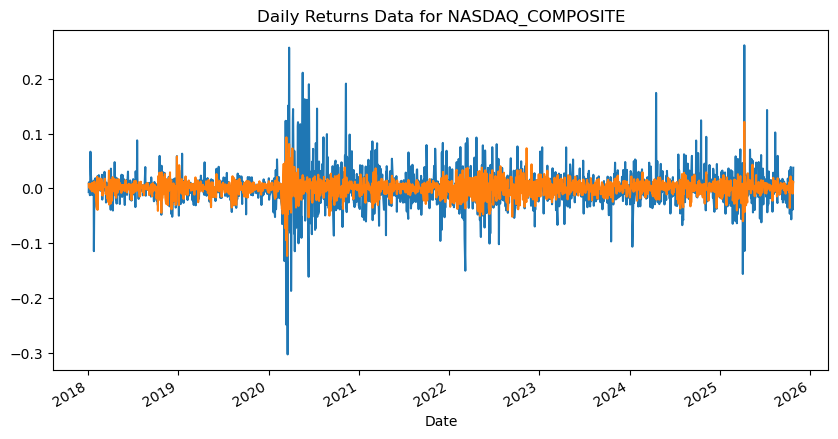

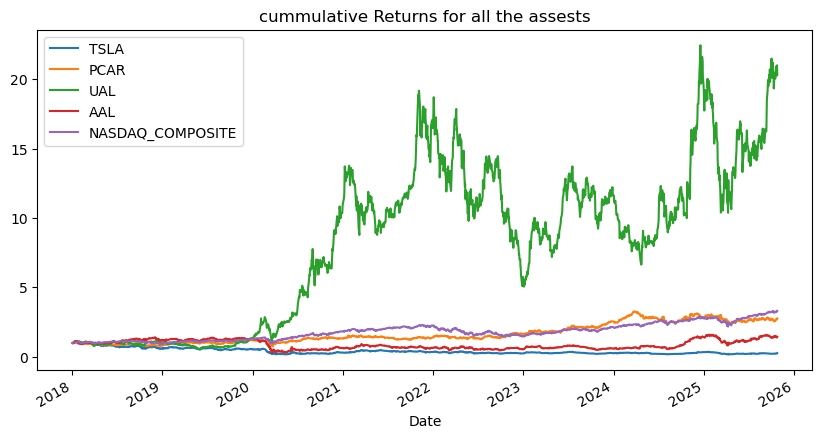

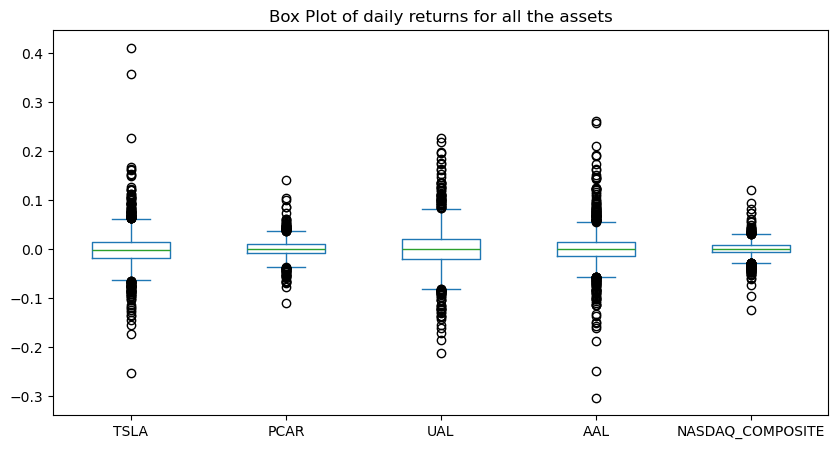

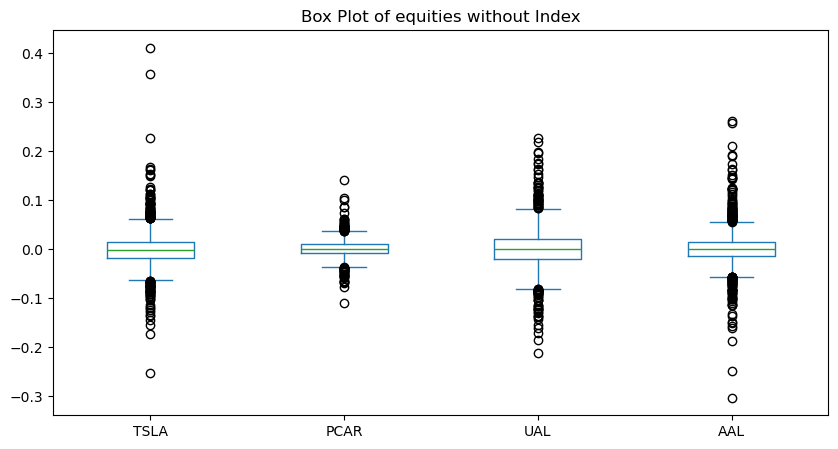

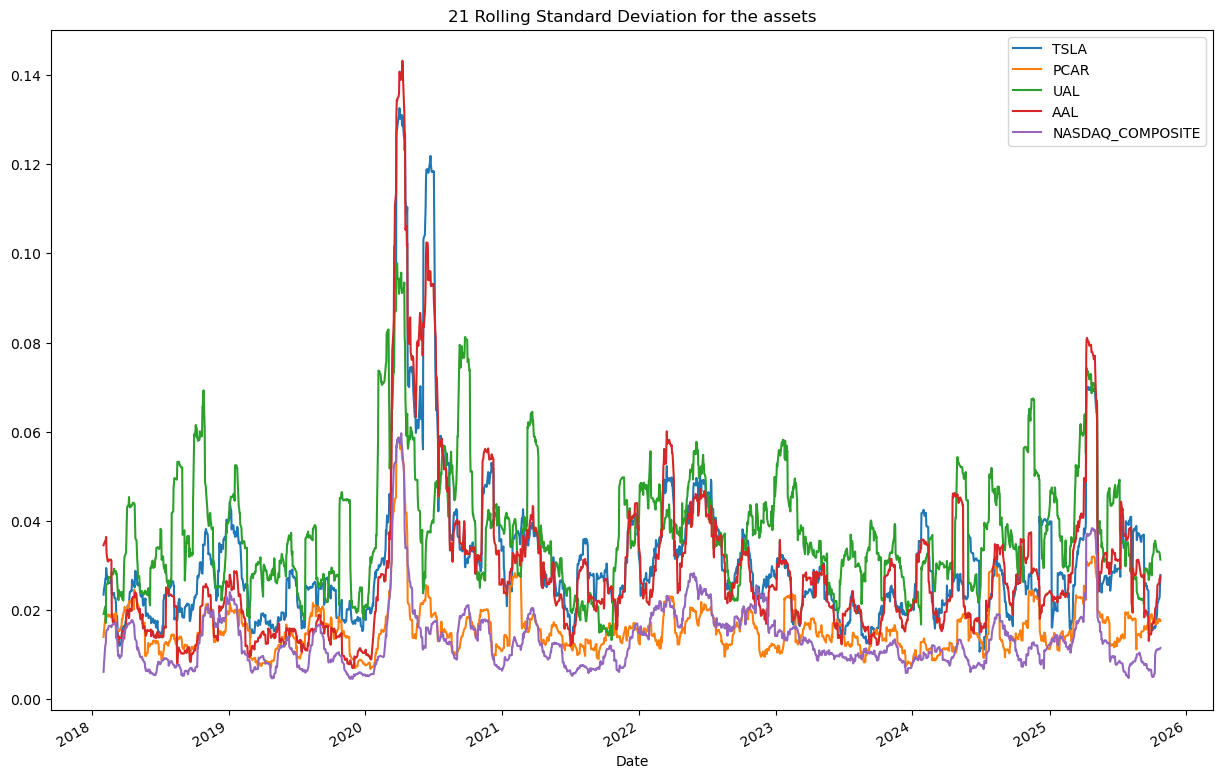

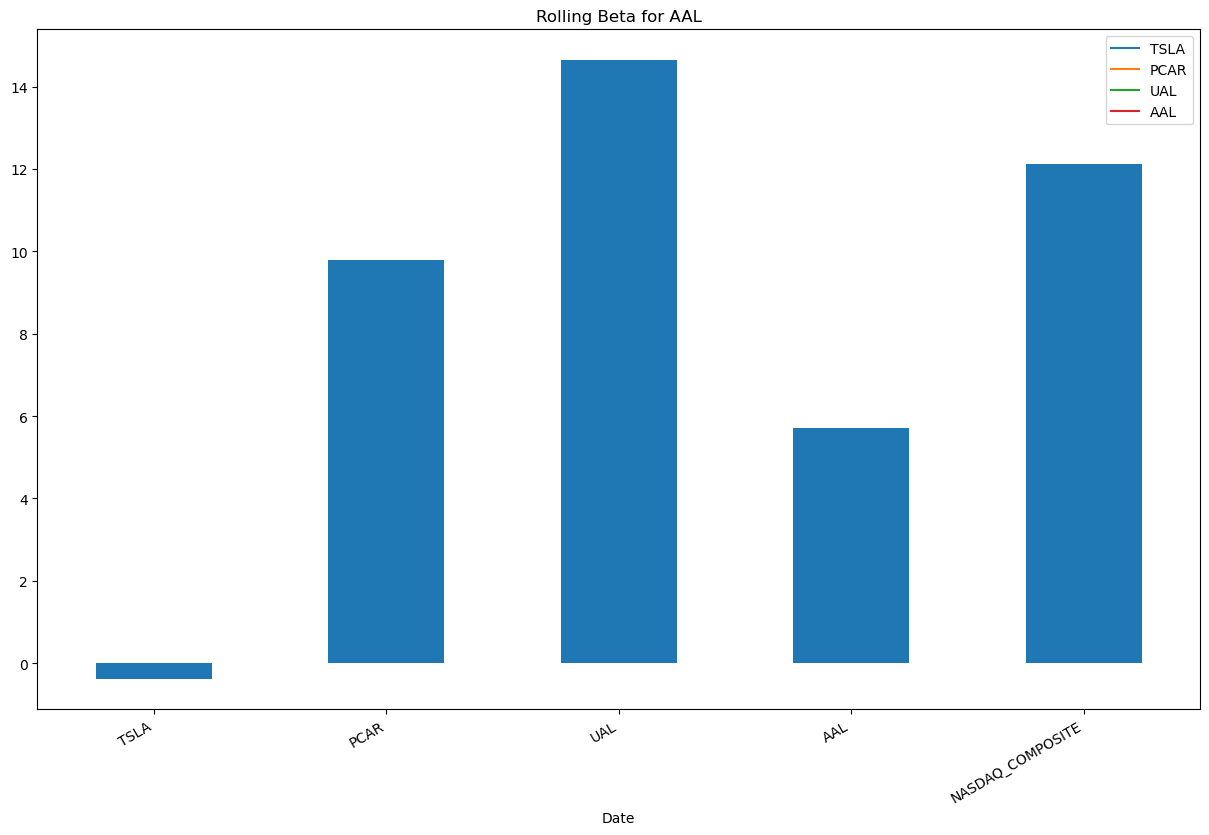

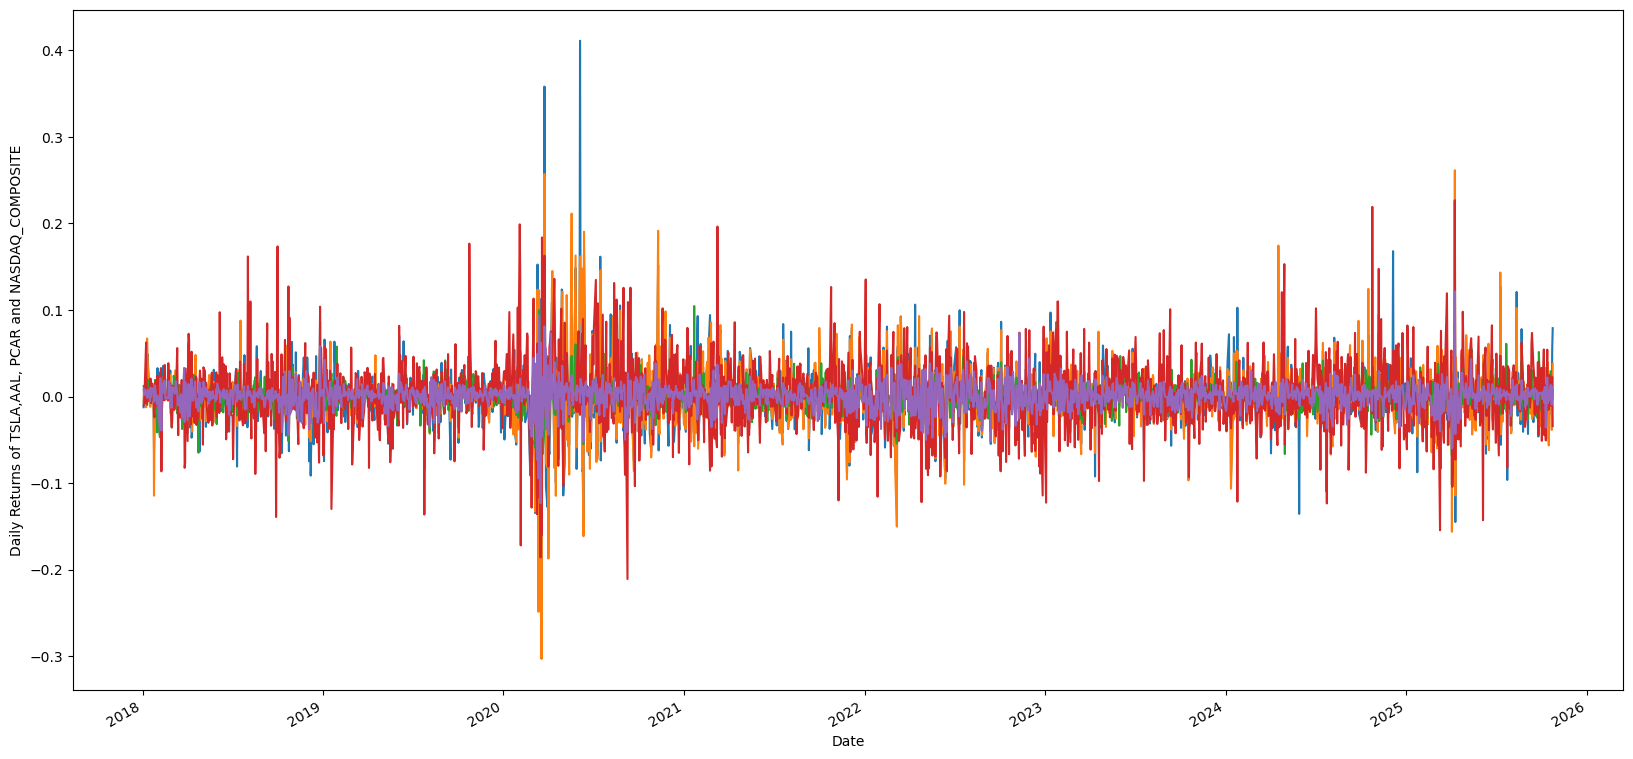

In [251]:
plt.figure(figsize = (20,10))
data_daily_returns.TSLA.plot()
data_daily_returns.AAL.plot()
data_daily_returns.PCAR.plot()
data_daily_returns.UAL.plot()
data_daily_returns['NASDAQ_COMPOSITE'].plot()
plt.ylabel('Daily Returns of TSLA,AAL, PCAR and NASDAQ_COMPOSITE')
plt.show()

In [252]:
X = data_daily_returns['NASDAQ_COMPOSITE'].values
Y = data_daily_returns.TSLA.values
Z = data_daily_returns.AAL.values
T = data_daily_returns.PCAR.values
Q = data_daily_returns.UAL.values

In [253]:
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    x = x[:,1]
    return model.params[0], model.params[1]

In [254]:
tslaalpha, tslabeta = linreg(X,Y)
print ('TSLA_alpha: ' + str(tslaalpha))
print ('TSLA_beta: ' + str(tslabeta))

TSLA_alpha: -0.0008126519459443678
TSLA_beta: 1.0512417557219127


In [289]:
AALalpha,AALbeta = linreg(X,Z)
print ('AAL_alpha: ' + str(AALalpha))
print ('AAL_beta: ' + str(AALbeta))

AAL_alpha: 6.4902243723997835e-06
AAL_beta: 1.0728944440104737


In [293]:
pcaralpha,pcarbeta = linreg(X,T)
print ('Pcar_alpha: ' + str(pcaralpha))
print ('Pcar_beta: ' + str(pcarbeta))

Pcar_alpha: 0.0002178712548700645
Pcar_beta: 0.6109623666227963


In [299]:
ualalpha,ualbeta = linreg(X,T)
print ('UAL_alpha: ' + str(ualalpha))
print ('UAL_beta: ' + str(ualbeta))

UAL_alpha: 0.0002178712548700645
UAL_beta: 0.6109623666227963


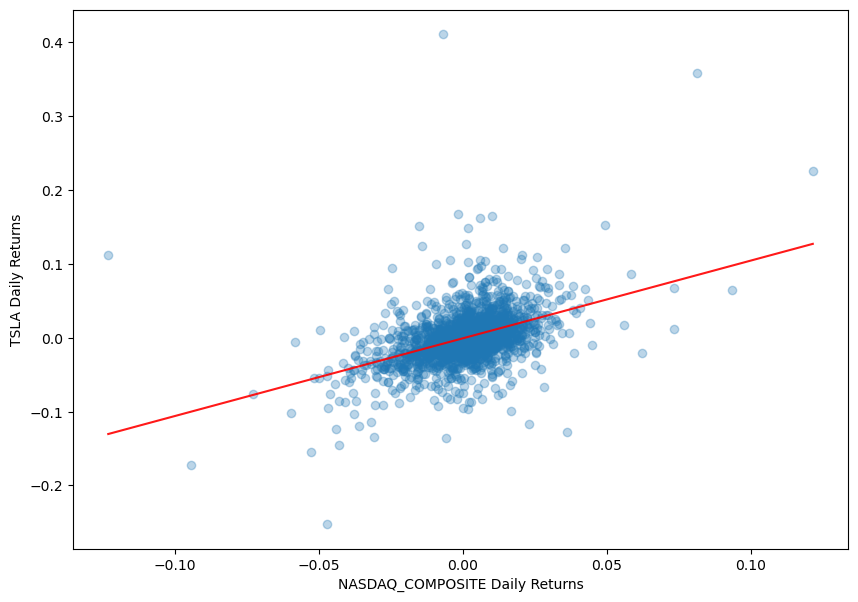

In [303]:
X1 = np.linspace(X.min(),X.max(),100)
Y_hat = X1*tslabeta + tslaalpha

plt.figure(figsize = (10,7))
plt.scatter(X, Y, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("TSLA Daily Returns")

plt.plot(X1, Y_hat, 'r', alpha=0.9)
plt.show()

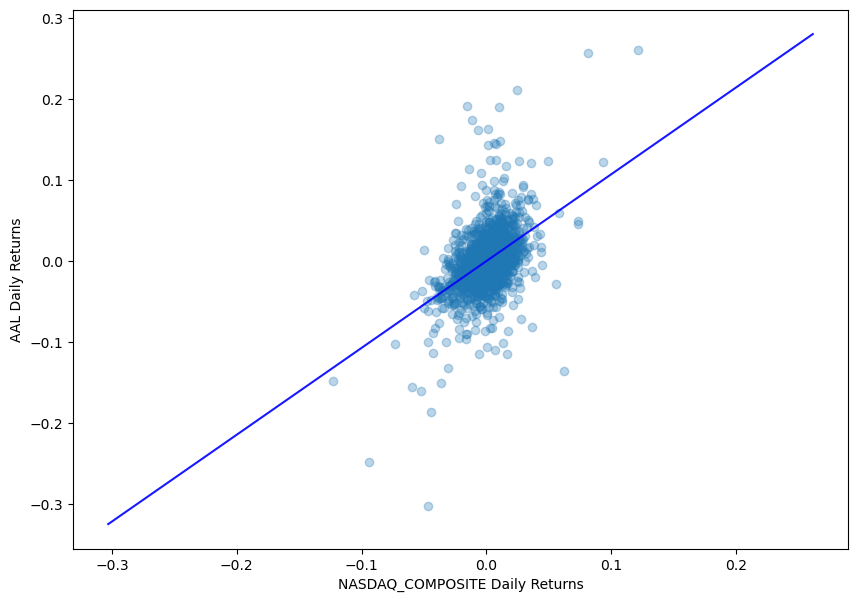

In [311]:
X2 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*AALbeta + AALalpha

plt.figure(figsize = (10,7))
plt.scatter(X, Z, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("AAL Daily Returns")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()

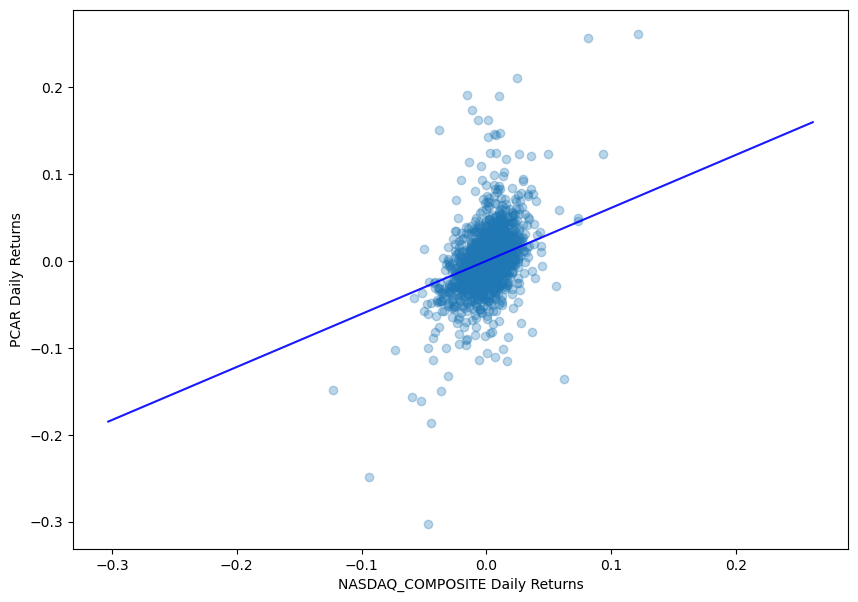

In [317]:
X2 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*pcarbeta + pcaralpha

plt.figure(figsize = (10,7))
plt.scatter(X, Z, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("PCAR Daily Returns")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()

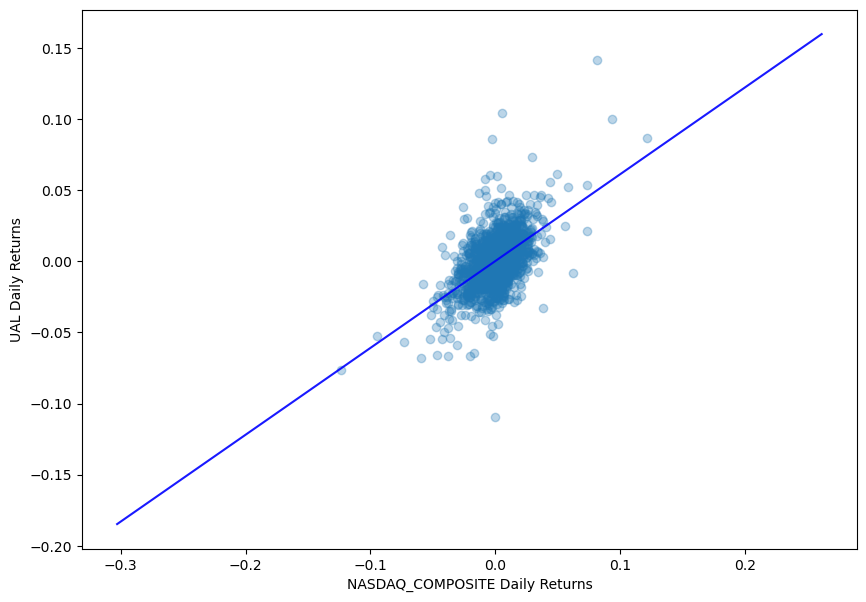

In [321]:
X3 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*ualbeta + ualalpha

plt.figure(figsize = (10,7))
plt.scatter(X, T, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("UAL Daily Returns")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()